In [1]:
import numpy as np
import pandas as pd
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Embedding,Dense,LSTM, Dropout

In [2]:
depression_corpus2 = pd.read_csv("cleaned_data_lemmatized.csv")
depression_corpus2.drop("Unnamed: 0", axis = 1, inplace = True)
depression_corpus2.dropna(subset = ["lemmatized"], inplace = True)
df_sorted = depression_corpus2.sort_values(['id', 'date'], ascending = [True, True])

In [3]:
Vocab_size = 10000
encoded_reviews = [one_hot(d,Vocab_size) for d in depression_corpus2 ["text"]]

In [4]:
max_length = 23
padded_reviews = pad_sequences(encoded_reviews,maxlen=max_length,padding='post')

In [5]:
model = Sequential()
embedding_layer = Embedding(input_dim=Vocab_size,output_dim=128,input_length=max_length)
model.add(embedding_layer)
model.add(LSTM(128, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 23, 128)           131584    
                                                                 
 dropout (Dropout)           (None, 23, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 23, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 23, 64)            0         
                                                                 
 dense (Dense)               (None, 23, 1)             65        
                                                                 
Total params: 1,461,057
Trainable params: 1,461,057
Non-

In [7]:
model.fit(padded_reviews,depression_corpus2['depressive'],epochs=5,verbose='auto')


Epoch 1/5
9220/9220 [==============================] - 371s 40ms/step - loss: 0.3019 - acc: 0.8959
Epoch 2/5
9220/9220 [==============================] - 422s 46ms/step - loss: 0.2920 - acc: 0.8971
Epoch 3/5
9220/9220 [==============================] - 429s 47ms/step - loss: 0.2824 - acc: 0.8991
Epoch 4/5
9220/9220 [==============================] - 357s 39ms/step - loss: 0.2718 - acc: 0.9025
Epoch 5/5
9220/9220 [==============================] - 345s 37ms/step - loss: 0.2598 - acc: 0.9066


In [6]:
import visualkeras

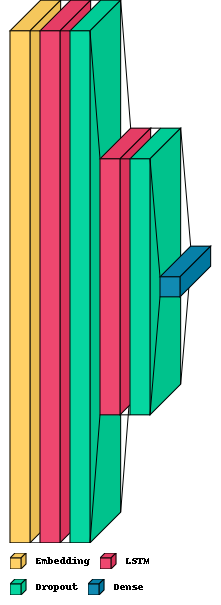

In [10]:
visualkeras.layered_view(model, legend=True)